# Plotting data

Plotting of data is pandas is handled by an external Python module called *matplotlib*. Like pandas it is a large library and has a venerable history (first released in 2003) and so we couldn't hope to cover all its functionality in this course. To see the wide range of possibilities you have with matplotlib see its [example gallery](http://matplotlib.org/gallery.html).

First we import `pandas` in the same way as we did previously.

In [1]:
import pandas as pd
from pandas import Series

Some matplotlib functionality is provided directly through pandas (such as the `plot()` method as we will see) but for some of it you need to import the matplotlib interface itself.

The most common interface to matplotlib is its `pyplot` module which provides a way to create figures and display them in the notebook. [By convention](http://matplotlib.org/faq/usage_faq.html#coding-styles) this is imported as `plt`.

In [2]:
import matplotlib.pyplot as plt

We first need to import some data to plot. Let's start with the data from the pandas section (available from [cetml1659on.txt](https://raw.githubusercontent.com/milliams/data_analysis_python/master/cetml1659on.txt)) and import it into a `DataFrame`:

In [3]:
temperature = pd.read_csv(
    "https://milliams.com/courses/data_analysis_python/cetml1659on.txt",  # file name
    skiprows=6,  # skip header
    delim_whitespace=True,  # whitespace separated
    na_values=['-99.9', '-99.99'],  # NaNs
)
temperature.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
1659,3.0,4.0,6.0,7.0,11.0,13.0,16.0,16.0,13.0,10.0,5.0,2.0,8.87
1660,0.0,4.0,6.0,9.0,11.0,14.0,15.0,16.0,13.0,10.0,6.0,5.0,9.10
1661,5.0,5.0,6.0,8.0,11.0,14.0,15.0,15.0,13.0,11.0,8.0,6.0,9.78
1662,5.0,6.0,6.0,8.0,11.0,15.0,15.0,15.0,13.0,11.0,6.0,3.0,9.52
1663,1.0,1.0,5.0,7.0,10.0,14.0,15.0,15.0,13.0,10.0,7.0,5.0,8.63


Pandas integrates matplotlib directly into itself so any dataframe can be plotted easily simply by calling the `plot()` method on one of the columns. This creates a plot object which you can then edit and alter which we save as the variable `year_plot`. We can then manipulate this object, for example by setting the axis labels using the `year_plot.set_ylabel()` function before displaying it with `plt.show()`.

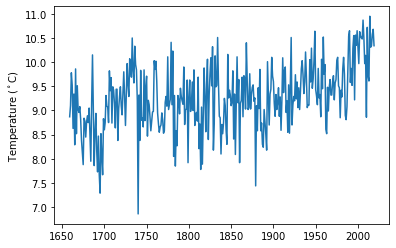

In [4]:
year_plot = temperature['YEAR'].plot()

year_plot.set_ylabel(r'Temperature ($^\circ$C)')

plt.show()

### Exercise

- Make sure you can reproduce the plot above. Try tweaking the labels or which column is plotted.
- Try putting in two `plot()` calls with different months (January and July for example) before calling `show()`.
- Add in a x-axis label
- [<small>answer</small>](answer_plot_months.ipynb)

## Bar charts

Of course, Matplotlib can plot more than just line graphs. One of the other most common plot types is a bar chart. Let's work towards plotting a bar chart of the average temperature per decade.

Let's start by adding a new column to the data frame which represents the decade. We create it by taking the index (which is a list of years), dividing it by 10 (using *integer division* which rounds down) so e.g. `1662` become `166` and then multiplying it by 10 to it's four digits again:

In [5]:
decade = (temperature.index // 10) * 10

temperature['decade'] = decade
temperature.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR,decade
1659,3.0,4.0,6.0,7.0,11.0,13.0,16.0,16.0,13.0,10.0,5.0,2.0,8.87,1650
1660,0.0,4.0,6.0,9.0,11.0,14.0,15.0,16.0,13.0,10.0,6.0,5.0,9.10,1660
1661,5.0,5.0,6.0,8.0,11.0,14.0,15.0,15.0,13.0,11.0,8.0,6.0,9.78,1660
1662,5.0,6.0,6.0,8.0,11.0,15.0,15.0,15.0,13.0,11.0,6.0,3.0,9.52,1660
1663,1.0,1.0,5.0,7.0,10.0,14.0,15.0,15.0,13.0,10.0,7.0,5.0,8.63,1660


Every row now has a value which tells it which decade it is part of.

Once we have our decade column, we can use Pandas `groupby()` function to gather our data by decade and then aggregate it by taking the mean of each decade.

In [6]:
by_decade = temperature.groupby('decade').mean()

by_decade.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
decade,,,,,,,,,,,,,
1650,3.00,4.00,6.00,7.00,11.00,13.00,16.00,16.00,13.00,10.00,5.00,2.00,8.870
1660,2.60,4.00,5.10,7.70,10.60,14.50,16.00,15.70,13.30,10.00,6.30,3.80,9.157
1670,3.25,2.35,4.50,7.25,11.05,14.40,15.80,15.25,12.40,8.95,5.20,2.45,8.607
1680,2.50,2.80,4.80,7.40,11.45,14.00,15.45,14.90,12.70,9.55,5.45,4.05,8.785
1690,1.89,2.49,3.99,6.79,9.60,13.44,15.27,14.65,11.93,8.64,5.26,3.31,8.134


At this point, `by_decade` is a standard Pandas `DataFrame` so we can plot it like any other. We can tell it to print a bar chart by putting `.bar` after the `plot` call:

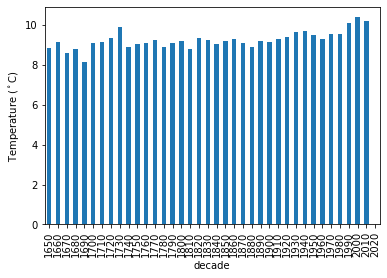

In [7]:
ax = by_decade["YEAR"].plot.bar()

ax.set_ylabel(r'Temperature ($^\circ$C)')

plt.show()

### Exercise

1. Plot a bar chart of the average temperature per *century*.
 - Set the limits of the y-axis to zoom in on the data.
 - [<small>answer</small>](answer_plot_bar_century.ipynb)

2. Plot a *histogram* of the average annual temperature
 - Make sure that the x-axis is labelled correctly.
 - Tip: Look in the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) for the right command to run
 - [<small>answer</small>](answer_plot_histogram.ipynb)
 
3. Plot a scatter plot of each year's February temperature plotted against that year's January temperature. Is there an obvious correlation?
 - [<small>answer</small>](answer_plot_scatter.ipynb)

## Saving plot to a file

You can take any plot you've created within Jupyter and save it to a file on disk using the `fig.savefig()` function. You give the function the name of the file to create and it will use whatever format is specified by the name. Note that you must save the fig before you `show()` it, otherwise it will not create the figure correctly.

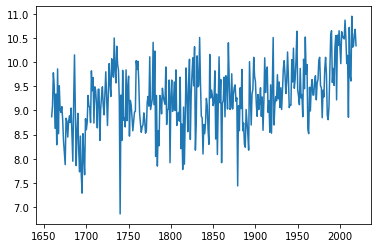

In [8]:
fig, ax = plt.subplots()

temperature["YEAR"].plot(ax=ax)

fig.savefig('my_fig.png')

You can then display the figure in Markdown node in Jupyter with `![](my_fig.png)`

![](my_fig.png)

### Exercise

Going back to your temperature data plot:
- Save the figure to a file and display it in your Jupyter notebook.